# Introduction

Name | Abid Ilmun Fisabil<br>
Batch | FTDS-006<br>
Phase | 1

## Data Description

### Source:

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:
1. bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2. bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3. bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
4. bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

### Attribute Information:

#### **Input variables:**
#### bank client data:
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')

#### related with the last contact of the current campaign:
8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### other attributes:
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

#### social and economic context attributes
16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

#### Output variable (desired target):
21. y - has the client subscribed a term deposit? (binary: 'yes','no')

#### **Relevant Papers:**

S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimaraes, Portugal, October, 2011. EUROSIS. [bank.zip]


# Importing Packages

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler, RobustScaler, PowerTransformer, FunctionTransformer
from category_encoders.target_encoder import TargetEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer as mct
from sklearn.model_selection import train_test_split as tts, StratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import classification_report as cr
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from yellowbrick.classifier import DiscriminationThreshold
from IPython.display import clear_output

import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [68]:
df = pd.read_csv('../input/bank-additional-full/bank-additional-full.csv', delimiter = ';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Exploration

In [6]:
df.shape

(41188, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [9]:
df.duplicated().sum()

12

In [10]:
df.y.value_counts()/df.shape[0]

no     0.887346
yes    0.112654
Name: y, dtype: float64

In [11]:
cols = df.dtypes[df.dtypes == object].index

**Intitial Findings**
1. data is shaped 41188 by 21
2. no null values
3. no duplicates
4. 11% of positive targets and 88% of negative targets (imbalanced)

## Visualizations

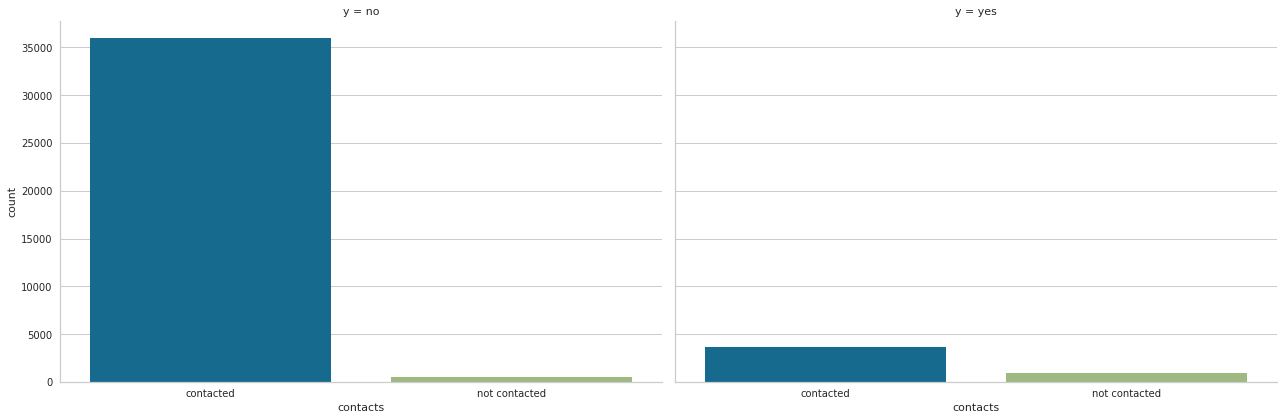

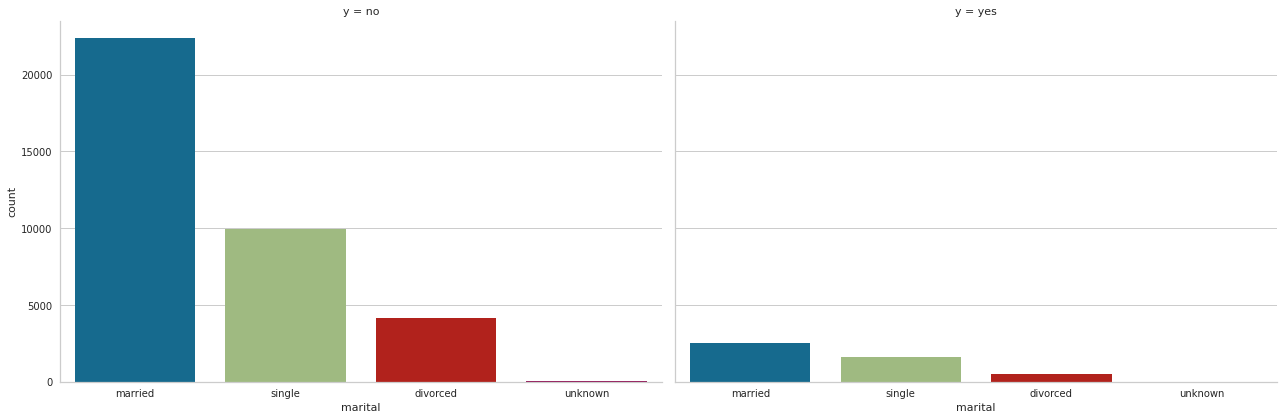

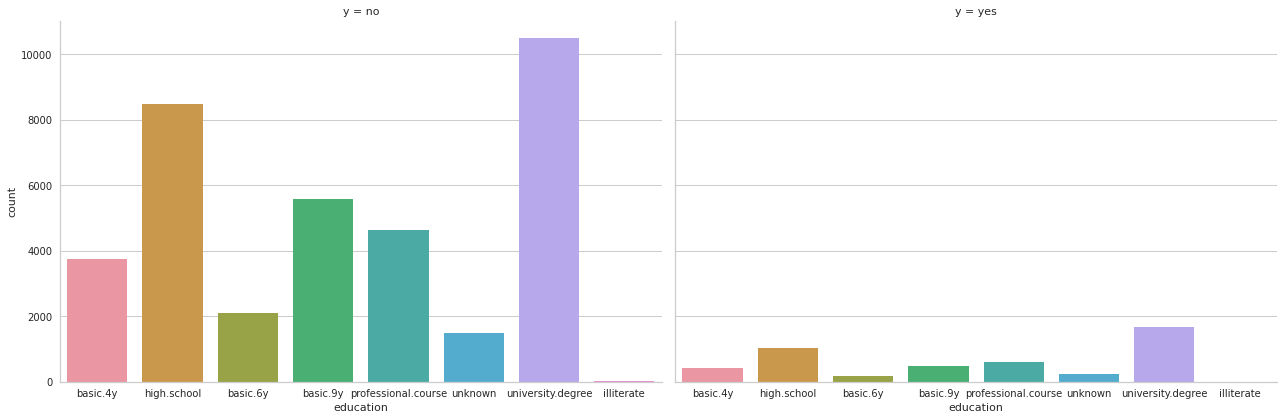

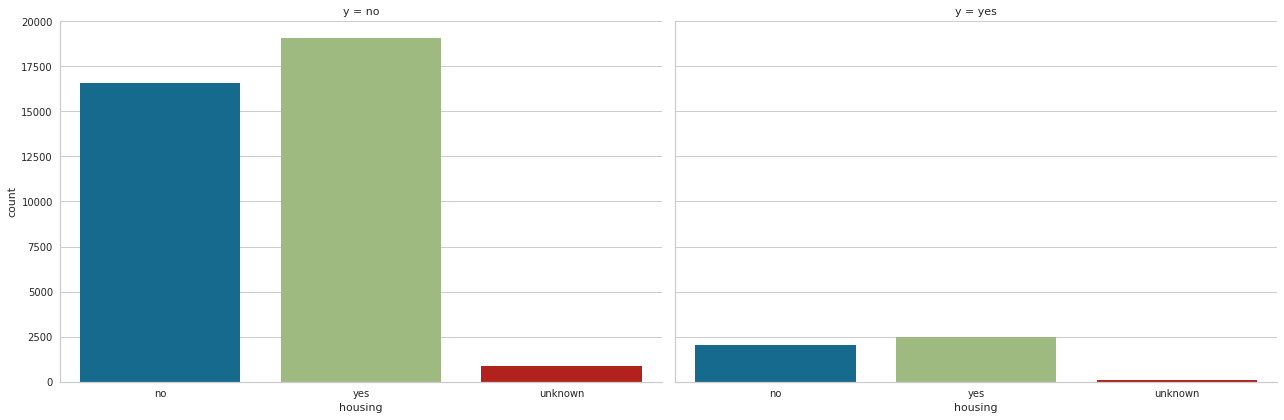

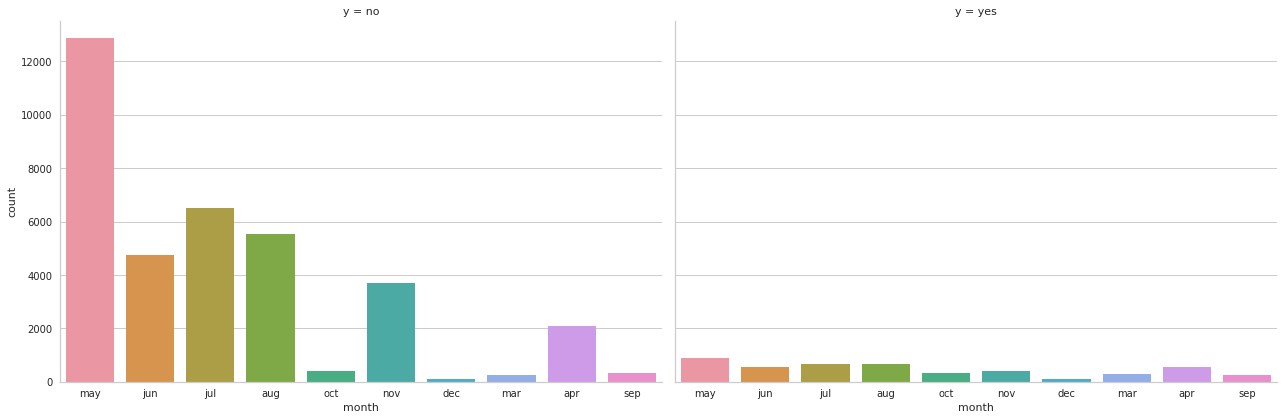

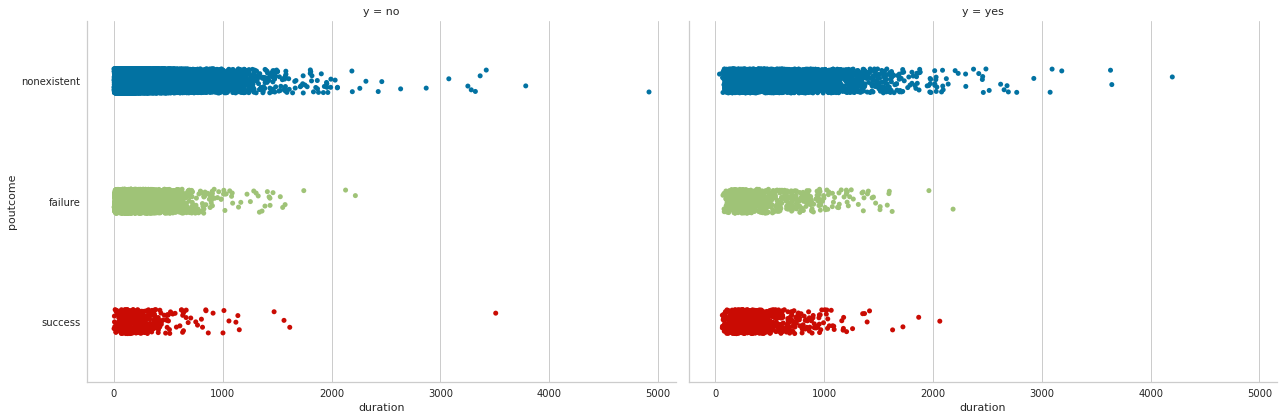

In [14]:
dff = df.copy()
dff['contacts'] = ['contacted' if i == 999 else 'not contacted' for i in dff.pdays]
sns.catplot(x="contacts", col="y",data=dff, kind="count",height=6, aspect=1.5);
sns.catplot(x="marital", col="y",data=df, kind="count",height=6, aspect=1.5);
sns.catplot(x="education", col="y",data=df, kind="count",height=6, aspect=1.5);
sns.catplot(x="housing", col="y",data=df, kind="count",height=6, aspect=1.5);
sns.catplot(x="month", col="y",data=df, kind="count",height=6, aspect=1.5);
sns.catplot(x="duration", y="poutcome", col = 'y', data=df, height=6, aspect=1.5);

**Catplot Insights**<br>
1. most of subscribers coming from people that have been contacted and we get small portion that have not been contacted. but that doesnt necessarily mean if we contact the costumer they will eventually subsribe.
2. most of subscribers coming from people that are married and we get almost same portion that are single. but that doesnt necessarily mean if they are married they will eventually subsribe.
3. most of subscribers coming from people that have been contacted and we get small portion that have not been contacted. but that doesnt necessarily mean if we contact the costumer they will eventually subsribe.
4. more people with certain educational background will subscribe and so tiny almost none from those who are illiterate
5. we get most of our subsribers between march to august and getting less at the end of the year
6. on average most of subcribers have been contacted with around 1000 to 1500. if it's over than that we will get lesser

***our machine learning model will have hard time predicting which costumer will subscribe. the reason is that the distribution of subsribers or non-subscribers seems twinning***

In [28]:
num_cols = df.dtypes[df.dtypes != object].index
transYjs = PowerTransformer('yeo-johnson')
transCbrt = FunctionTransformer(np.cbrt)
print('Original\n')
print(df[num_cols].skew(),'\n\n')
print('Cuber Root\n')
print(transCbrt.fit_transform(df[num_cols]).skew(),'\n\n')
print('Yeo Johnson\n')
print(pd.DataFrame(transYjs.fit_transform(df[num_cols]),columns = num_cols).skew(),'\n\n')

Original

age               0.784697
duration          3.263141
campaign          4.762507
pdays            -4.922190
previous          3.832042
emp.var.rate     -0.724096
cons.price.idx   -0.230888
cons.conf.idx     0.303180
euribor3m        -0.709188
nr.employed      -1.044262
dtype: float64 


Cuber Root

age               0.333630
duration          0.664856
campaign          1.642787
pdays            -4.940439
previous          2.217340
emp.var.rate     -0.439144
cons.price.idx   -0.237813
cons.conf.idx     0.503173
euribor3m        -0.794279
nr.employed      -1.057155
dtype: float64 


Yeo Johnson

age               0.007336
duration          0.016940
campaign          0.268430
pdays            -4.922068
previous          2.116794
emp.var.rate     -0.414214
cons.price.idx   -0.038410
cons.conf.idx     0.047975
euribor3m        -0.649814
nr.employed      -0.502649
dtype: float64 




### **Cleaning**

In [69]:
df = df.drop_duplicates()

# Creating Model Building Tools

### Tools Dictionaries

In [29]:
models = {
    'LogisticRegression' :LogisticRegression(solver = 'liblinear',n_jobs = -1),
    'DecisionTreeClassifier' :DecisionTreeClassifier(random_state = 42),
    'SVC' :SVC(random_state = 42),
    'KNeighborsClassifier' :KNeighborsClassifier(n_jobs = -1),
    'RandomForestClassifier' :RandomForestClassifier(random_state = 42,n_jobs = -1),
    'GradientBoostingClassifier' :GradientBoostingClassifier(random_state = 42),
    'LGBMClassifier': LGBMClassifier(random_state = 42)
}
encoders = {
    'OneHotEncoder' :OneHotEncoder(handle_unknown = 'ignore'),
    'OrdinalEncoder' :OrdinalEncoder(),
    'TargetEncoder' :TargetEncoder(smoothing = 10,handle_unknown = 'ignore')
}

numTransformers = {
    'YeoJohnson' :PowerTransformer(method = 'yeo-johnson'),
    'cbrt' : FunctionTransformer(func = np.cbrt)
}

scalers = {
    'MinMaxScaler' :MinMaxScaler(),
    'StandardScaler' :StandardScaler(),
    'RobustScaler' :RobustScaler()
}

### Tools Functions

In [76]:
def create_encoder_comparator(df,mod,encoder):        
    x = df[df.columns[:-1]]
    y = df[df.columns[-1]]
    y = [1 if i == 'yes' else 0 for i in y]

    num_cols = x.dtypes[x.dtypes != object].index
    obj_cols = x.dtypes[x.dtypes == object].index
    
    ct = mct(
        (encoder,obj_cols),
        remainder = 'passthrough'
    )
    pipe = Pipeline(
        [
            ('ct',ct),
            ('mod',mod)
        ]
    )

    xtrain, xtest, ytrain, ytest = tts(x,y,test_size = .2,random_state = 23,stratify = y)
    pipe.fit(xtrain,ytrain)
    ypred = pipe.predict(xtest)
    print(cr(ytest,ypred))
    return pipe

def create_numTransformer_comparator(df,mod,encoder,numTransformer):        
    x = df[df.columns[:-1]]
    y = df[df.columns[-1]]
    y = [1 if i == 'yes' else 0 for i in y]

    num_cols = x.dtypes[x.dtypes != object].index
    obj_cols = x.dtypes[x.dtypes == object].index
    
    ct = mct(
        (encoder,obj_cols),
        (numTransformer,num_cols),
        remainder = 'passthrough'
    )
    pipe = Pipeline(
        [
            ('ct',ct),
            ('mod',mod)
        ]
    )
    
    
    xtrain, xtest, ytrain, ytest = tts(x,y,test_size = .2,random_state = 23,stratify = y)
    pipe.fit(xtrain,ytrain)
    ypred = pipe.predict(xtest)
    print(cr(ytest,ypred))
    return pipe


def create_full_model(df,mod,encoder,numTransformer,scaler,threshold = None):        
    x = df[df.columns[:-1]]
    y = df[df.columns[-1]]
    y = [1 if i == 'yes' else 0 for i in y]

    num_cols = x.dtypes[x.dtypes != object].index
    obj_cols = x.dtypes[x.dtypes == object].index
    
    ct = mct(
        (encoder,obj_cols),
        (numTransformer,num_cols),
        (scaler,num_cols),
        remainder = 'passthrough'
    )
    pipe = Pipeline(
        [
            ('ct',ct),
            ('mod',mod)
        ]
    )
    
    
    xtrain, xtest, ytrain, ytest = tts(x,y,test_size = .2,random_state = 23,stratify = y)
    pipe.fit(xtrain,ytrain)
    if threshold != None:
        ypred = [1 if i == True else 0 for i in (pipe.predict_proba(xtest)[:,1] >= threshold).astype(bool)]
    else:
        ypred = pipe.predict(xtest)
    print(cr(ytest,ypred))
    return pipe

def crossval_skfold(df,pipe,threshold = None):    

    x = df[df.columns[:-1]]
    x = np.array(x)

    num_cols =df[df.columns[:-1]].dtypes[df[df.columns[:-1]].dtypes != object].index
    obj_cols = df[df.columns[:-1]].dtypes[df[df.columns[:-1]].dtypes == object].index

    y = df[df.columns[-1]]
    y = [1 if i == 'yes' else 0 for i in y]
    y = np.array(y)

    skfold = StratifiedKFold(n_splits=5, shuffle = True,random_state = 23)

    metrics_ = []
    reports = []

    for train_index, test_index in skfold.split(x,y):

        xtrain = pd.DataFrame(x[train_index],columns = df.columns[:-1])
        xtest = pd.DataFrame(x[test_index],columns = df.columns[:-1])
        ytrain = y[train_index]
        ytest = y[test_index]

        xtrain[num_cols] = xtrain[num_cols].values.astype(float)
        xtest[num_cols] = xtest[num_cols].values.astype(float)

        pipe.fit(xtrain,ytrain)
        if threshold != None:
            ypred = [1 if i == True else 0 for i in (pipe.predict_proba(xtest)[:,1] >= threshold).astype(bool)]
        else:
            ypred = pipe.predict(xtest)
        metrics_.append([metrics.accuracy_score(ytest,ypred),
                         metrics.precision_score(ytest,ypred),
                         metrics.recall_score(ytest,ypred),
                         metrics.f1_score(ytest,ypred),])
        reports.append(cr(ytest,ypred))
        print('done')
    clear_output()
    print(pd.DataFrame(metrics_, columns = ['acc','prec','rec','f1']).mean())
    return metrics_, reports


def crossval_kfold(df,pipe,threshold = None):
    
    num_cols =df[df.columns[:-1]].dtypes[df[df.columns[:-1]].dtypes != object].index
    obj_cols = df[df.columns[:-1]].dtypes[df[df.columns[:-1]].dtypes == object].index

    df.y = [1 if i == 'yes' else 0 for i in df.y]

    kfold = KFold(n_splits=5,shuffle = True,random_state = 42)

    metrics_ = []
    reports = []

    for train_index, test_index in kfold.split(df):
        train = df.iloc[train_index]
        test = df.iloc[test_index]

        xtrain = train[train.columns[:-1]]
        xtest = test[test.columns[:-1]]
        ytrain = train[train.columns[-1]]
        ytest = test[test.columns[-1]]

        xtrain[num_cols] = xtrain[num_cols].values.astype(float)
        xtest[num_cols] = xtest[num_cols].values.astype(float)
        
        pipe.fit(xtrain,ytrain)
        if threshold != None:
            ypred = [1 if i == True else 0 for i in (pipe.predict_proba(xtest)[:,1] >= threshold).astype(bool)]
        else:
            ypred = pipe.predict(xtest)
        metrics_.append([metrics.accuracy_score(ytest,ypred),
                         metrics.precision_score(ytest,ypred),
                         metrics.recall_score(ytest,ypred),
                         metrics.f1_score(ytest,ypred),])
        reports.append(cr(ytest,ypred))
        print('done')
    clear_output()
    print(pd.DataFrame(metrics_, columns = ['acc','prec','rec','f1']).mean())
    return metrics_, reports

def dt_plot(df,pipe):
    x = df[df.columns[:-1]]
    y = df[df.columns[-1]]
    y = [1 if i == 'yes' else 0 for i in y]

    visualizer = DiscriminationThreshold(pipe)

    visualizer.fit(x, y)       
    visualizer.show();
    
def create_gridsearch_model(df,mod,encoder,numTransformer,scaler,grid,threshold = None):

    x = df[df.columns[:-1]]
    y = df[df.columns[-1]]
    y = [1 if i == 'yes' else 0 for i in y]

    num_cols = x.dtypes[x.dtypes != object].index
    obj_cols = x.dtypes[x.dtypes == object].index
    
    ct = mct(
        (encoder,obj_cols),
        (numTransformer,num_cols),
        (scaler,num_cols),
        remainder = 'passthrough'
    )
    pipe = Pipeline(
        [
            ('ct',ct),
            ('mod',mod)
        ]
    )
    
    
    xtrain, xtest, ytrain, ytest = tts(x,y,test_size = .2,random_state = 23,stratify = y)
    pipe.fit(xtrain,ytrain)
    if threshold != None:
        ypred = [1 if i == True else 0 for i in (pipe.predict_proba(xtest)[:,1] >= threshold).astype(bool)]
    else:
        ypred = pipe.predict(xtest)
    print(cr(ytest,ypred))
    return pipe

# Model Building

In [32]:
for mod in list(models.keys()):
    print(mod,'\n')
    create_encoder_comparator(df,models[mod],encoders['OneHotEncoder'])
    
    print('\n\n')

LogisticRegression 

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7308
           1       0.66      0.41      0.50       928

    accuracy                           0.91      8236
   macro avg       0.79      0.69      0.73      8236
weighted avg       0.90      0.91      0.90      8236




DecisionTreeClassifier 

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7308
           1       0.51      0.53      0.52       928

    accuracy                           0.89      8236
   macro avg       0.72      0.73      0.73      8236
weighted avg       0.89      0.89      0.89      8236




SVC 

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7308
           1       0.62      0.21      0.31       928

    accuracy                           0.90      8236
   macro avg       0.76      0.59      0.63      8236
weighted avg    

## Comparing Encoder performance

### LogisticRegression

In [33]:
for enc in list(encoders.keys()):
    print(enc,'\n')
    create_encoder_comparator(df,models['LogisticRegression'],encoders[enc])
    print('\n\n')

OneHotEncoder 

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7308
           1       0.66      0.41      0.50       928

    accuracy                           0.91      8236
   macro avg       0.79      0.69      0.73      8236
weighted avg       0.90      0.91      0.90      8236




OrdinalEncoder 

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7308
           1       0.66      0.41      0.51       928

    accuracy                           0.91      8236
   macro avg       0.80      0.69      0.73      8236
weighted avg       0.90      0.91      0.90      8236




TargetEncoder 

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7308
           1       0.66      0.41      0.50       928

    accuracy                           0.91      8236
   macro avg       0.79      0.69      0.73      8236
weighted avg       

### DecisionTreeClassifier

In [34]:
for enc in list(encoders.keys()):
    print(enc,'\n')
    create_encoder_comparator(df,models['DecisionTreeClassifier'],encoders[enc])
    print('\n\n')

OneHotEncoder 

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7308
           1       0.51      0.53      0.52       928

    accuracy                           0.89      8236
   macro avg       0.72      0.73      0.73      8236
weighted avg       0.89      0.89      0.89      8236




OrdinalEncoder 

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      7308
           1       0.48      0.50      0.49       928

    accuracy                           0.88      8236
   macro avg       0.71      0.72      0.71      8236
weighted avg       0.88      0.88      0.88      8236




TargetEncoder 

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7308
           1       0.50      0.51      0.51       928

    accuracy                           0.89      8236
   macro avg       0.72      0.72      0.72      8236
weighted avg       

### SVC

In [35]:
for enc in list(encoders.keys()):
    print(enc,'\n')
    create_encoder_comparator(df,models['SVC'],encoders[enc])
    print('\n\n')

OneHotEncoder 

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7308
           1       0.62      0.21      0.31       928

    accuracy                           0.90      8236
   macro avg       0.76      0.59      0.63      8236
weighted avg       0.87      0.90      0.87      8236




OrdinalEncoder 

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7308
           1       0.62      0.21      0.31       928

    accuracy                           0.90      8236
   macro avg       0.76      0.60      0.63      8236
weighted avg       0.87      0.90      0.87      8236




TargetEncoder 

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7308
           1       0.62      0.21      0.31       928

    accuracy                           0.90      8236
   macro avg       0.76      0.60      0.63      8236
weighted avg       

### KNeighborsClassifier

In [36]:
for enc in list(encoders.keys()):
    print(enc,'\n')
    create_encoder_comparator(df,models['KNeighborsClassifier'],encoders[enc])
    print('\n\n')

OneHotEncoder 

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7308
           1       0.61      0.50      0.55       928

    accuracy                           0.91      8236
   macro avg       0.77      0.73      0.75      8236
weighted avg       0.90      0.91      0.90      8236




OrdinalEncoder 

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7308
           1       0.60      0.49      0.54       928

    accuracy                           0.91      8236
   macro avg       0.77      0.72      0.74      8236
weighted avg       0.90      0.91      0.90      8236




TargetEncoder 

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7308
           1       0.61      0.49      0.54       928

    accuracy                           0.91      8236
   macro avg       0.77      0.73      0.75      8236
weighted avg       

### RandomForestClassifier

In [37]:
for enc in list(encoders.keys()):
    print(enc,'\n')
    create_encoder_comparator(df,models['RandomForestClassifier'],encoders[enc])
    print('\n\n')

OneHotEncoder 

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7308
           1       0.66      0.47      0.55       928

    accuracy                           0.91      8236
   macro avg       0.80      0.72      0.75      8236
weighted avg       0.90      0.91      0.91      8236




OrdinalEncoder 

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7308
           1       0.66      0.52      0.58       928

    accuracy                           0.92      8236
   macro avg       0.80      0.74      0.77      8236
weighted avg       0.91      0.92      0.91      8236




TargetEncoder 

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7308
           1       0.66      0.52      0.58       928

    accuracy                           0.92      8236
   macro avg       0.80      0.74      0.77      8236
weighted avg       

### GradientBoostingClassifier

In [38]:
for enc in list(encoders.keys()):
    print(enc,'\n')
    create_encoder_comparator(df,models['GradientBoostingClassifier'],encoders[enc])
    print('\n\n')

OneHotEncoder 

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7308
           1       0.66      0.53      0.59       928

    accuracy                           0.92      8236
   macro avg       0.80      0.75      0.77      8236
weighted avg       0.91      0.92      0.91      8236




OrdinalEncoder 

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7308
           1       0.66      0.53      0.59       928

    accuracy                           0.92      8236
   macro avg       0.80      0.75      0.77      8236
weighted avg       0.91      0.92      0.91      8236




TargetEncoder 

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7308
           1       0.66      0.53      0.59       928

    accuracy                           0.92      8236
   macro avg       0.80      0.75      0.77      8236
weighted avg       

### LGBMClassifier

In [39]:
for enc in list(encoders.keys()):
    print(enc,'\n')
    create_encoder_comparator(df,models['LGBMClassifier'],encoders[enc])
    print('\n\n')

OneHotEncoder 

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7308
           1       0.65      0.56      0.60       928

    accuracy                           0.92      8236
   macro avg       0.80      0.76      0.78      8236
weighted avg       0.91      0.92      0.91      8236




OrdinalEncoder 

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      7308
           1       0.65      0.56      0.60       928

    accuracy                           0.92      8236
   macro avg       0.80      0.76      0.78      8236
weighted avg       0.91      0.92      0.91      8236




TargetEncoder 

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      7308
           1       0.66      0.56      0.60       928

    accuracy                           0.92      8236
   macro avg       0.80      0.76      0.78      8236
weighted avg       

***since the data is severly imbalanced, model selection will be based on harmonic mean of precision and recall (f1 score) from positive targets***
### **1. initial models**

the weakest algorithm is SVC with 31% and the best algorithm is LGBMClassifier

### **2. encoders comparison**
    1. LR - OrdinalEncoder with 51% f1
    2. DTC - OneHotEncoder wih 51% f1
    3. SVC - all same with 31% f1
    4. KNC - OneHotEncoder with 55% f1
    5. RFC - either Ordinal or Target Encoder with 58% f1
    6. GBC - all same with 59% f1
    7. LGBM - all same with 60% f1 but Target Encoder slightly better with precision of 66%

## Numerical Transformer Comparison

### Logistic Regression

In [40]:
for trans in list(numTransformers.keys()):
    print(trans,'\n')
    create_numTransformer_comparator(df,
                                    models['LogisticRegression'],
                                    encoders['TargetEncoder'],
                                    numTransformers[trans])
    print('\n\n')

YeoJohnson 

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7308
           1       0.63      0.41      0.50       928

    accuracy                           0.91      8236
   macro avg       0.78      0.69      0.72      8236
weighted avg       0.90      0.91      0.90      8236




cbrt 

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7308
           1       0.62      0.41      0.49       928

    accuracy                           0.91      8236
   macro avg       0.78      0.69      0.72      8236
weighted avg       0.89      0.91      0.90      8236






### DecisionTreeClassifier

In [41]:
for trans in list(numTransformers.keys()):
    print(trans,'\n')
    create_numTransformer_comparator(df,
                                    models['DecisionTreeClassifier'],
                                    encoders['TargetEncoder'],
                                    numTransformers[trans])
    print('\n\n')

YeoJohnson 

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      7308
           1       0.49      0.49      0.49       928

    accuracy                           0.88      8236
   macro avg       0.71      0.71      0.71      8236
weighted avg       0.88      0.88      0.88      8236




cbrt 

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7308
           1       0.50      0.51      0.51       928

    accuracy                           0.89      8236
   macro avg       0.72      0.72      0.72      8236
weighted avg       0.89      0.89      0.89      8236






### SVC

In [42]:
for trans in list(numTransformers.keys()):
    print(trans,'\n')
    create_numTransformer_comparator(df,
                                    models['SVC'],
                                    encoders['TargetEncoder'],
                                    numTransformers[trans])
    print('\n\n')

YeoJohnson 

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7308
           1       0.69      0.37      0.48       928

    accuracy                           0.91      8236
   macro avg       0.81      0.67      0.72      8236
weighted avg       0.90      0.91      0.90      8236




cbrt 

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7308
           1       0.62      0.20      0.30       928

    accuracy                           0.90      8236
   macro avg       0.76      0.59      0.62      8236
weighted avg       0.87      0.90      0.87      8236






### KNeighborsClassifier

In [43]:
for trans in list(numTransformers.keys()):
    print(trans,'\n')
    create_numTransformer_comparator(df,
                                    models['KNeighborsClassifier'],
                                    encoders['TargetEncoder'],
                                    numTransformers[trans])
    print('\n\n')

YeoJohnson 

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      7308
           1       0.59      0.51      0.55       928

    accuracy                           0.90      8236
   macro avg       0.76      0.73      0.75      8236
weighted avg       0.90      0.90      0.90      8236




cbrt 

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      7308
           1       0.58      0.50      0.54       928

    accuracy                           0.90      8236
   macro avg       0.76      0.73      0.74      8236
weighted avg       0.90      0.90      0.90      8236






### RandomForestClassifier

In [44]:
for trans in list(numTransformers.keys()):
    print(trans,'\n')
    create_numTransformer_comparator(df,
                                    models['RandomForestClassifier'],
                                    encoders['TargetEncoder'],
                                    numTransformers[trans])
    print('\n\n')

YeoJohnson 

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7308
           1       0.66      0.53      0.59       928

    accuracy                           0.92      8236
   macro avg       0.80      0.75      0.77      8236
weighted avg       0.91      0.92      0.91      8236




cbrt 

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7308
           1       0.66      0.52      0.58       928

    accuracy                           0.92      8236
   macro avg       0.80      0.74      0.77      8236
weighted avg       0.91      0.92      0.91      8236






### GradientBoostingClassifier

In [45]:
for trans in list(numTransformers.keys()):
    print(trans,'\n')
    create_numTransformer_comparator(df,
                                    models['GradientBoostingClassifier'],
                                    encoders['TargetEncoder'],
                                    numTransformers[trans])
    print('\n\n')

YeoJohnson 

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7308
           1       0.66      0.52      0.58       928

    accuracy                           0.92      8236
   macro avg       0.80      0.74      0.77      8236
weighted avg       0.91      0.92      0.91      8236




cbrt 

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7308
           1       0.66      0.53      0.59       928

    accuracy                           0.92      8236
   macro avg       0.80      0.75      0.77      8236
weighted avg       0.91      0.92      0.91      8236






### LGBMClassifier

In [46]:
for trans in list(numTransformers.keys()):
    print(trans,'\n')
    create_numTransformer_comparator(df,
                                    models['LGBMClassifier'],
                                    encoders['TargetEncoder'],
                                    numTransformers[trans])
    print('\n\n')

YeoJohnson 

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7308
           1       0.64      0.55      0.59       928

    accuracy                           0.91      8236
   macro avg       0.79      0.76      0.77      8236
weighted avg       0.91      0.91      0.91      8236




cbrt 

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      7308
           1       0.66      0.56      0.60       928

    accuracy                           0.92      8236
   macro avg       0.80      0.76      0.78      8236
weighted avg       0.91      0.92      0.91      8236






***we wil use harmonic mean of precision and recall (f1 score) from positive targets as our assessment tool***


#### **encoders comparison**
    1. LR - YJS is better with 50% f1
    2. DTC - CBRT wih 51% f1
    3. SVC - YJS is better at 48% f1
    4. KNC - YJS with 55% f1
    5. RFC - YJS with 59% f1
    6. GBC - CBRT with 59% f1
    7. LGBM - CBRT with 60% f1

### LGBMClassifier Before Scaling

In [50]:
print('LGBMClassifier','\n')
create_numTransformer_comparator(df,
                                models['LGBMClassifier'],
                                encoders['TargetEncoder'],
                                numTransformers['YeoJohnson'])
print('\n\n')

LGBMClassifier 

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7308
           1       0.64      0.55      0.59       928

    accuracy                           0.91      8236
   macro avg       0.79      0.76      0.77      8236
weighted avg       0.91      0.91      0.91      8236






### LGBMClassifier After Scaling

In [51]:
for scaler in list(scalers.keys()):
    print(scaler,'\n')
    pipe1 = create_full_model(df,
                             models['LGBMClassifier'],
                             encoders['TargetEncoder'],
                             numTransformers['YeoJohnson'],
                             scalers[scaler],
                            )
    print('\n\n')

MinMaxScaler 

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7308
           1       0.65      0.56      0.60       928

    accuracy                           0.92      8236
   macro avg       0.80      0.76      0.78      8236
weighted avg       0.91      0.92      0.91      8236




StandardScaler 

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      7308
           1       0.65      0.56      0.60       928

    accuracy                           0.92      8236
   macro avg       0.80      0.76      0.78      8236
weighted avg       0.91      0.92      0.91      8236




RobustScaler 

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7308
           1       0.64      0.56      0.60       928

    accuracy                           0.92      8236
   macro avg       0.79      0.76      0.78      8236
weighted avg       0.

### GradientBoostingClassifier Before Scaling

In [54]:
print('GradientBoostingClassifier','\n')
create_numTransformer_comparator(df,
                                models['GradientBoostingClassifier'],
                                encoders['TargetEncoder'],
                                numTransformers['YeoJohnson'])
print('\n\n')

GradientBoostingClassifier 

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7308
           1       0.66      0.52      0.58       928

    accuracy                           0.92      8236
   macro avg       0.80      0.74      0.77      8236
weighted avg       0.91      0.92      0.91      8236






### GradientBoostingClassifier After Scaling

In [55]:
for scaler in list(scalers.keys()):
    print(scaler,'\n')
    pipe1 = create_full_model(df,
                             models['GradientBoostingClassifier'],
                             encoders['TargetEncoder'],
                             numTransformers['YeoJohnson'],
                             scalers[scaler],
                            )
    print('\n\n')

MinMaxScaler 

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7308
           1       0.66      0.53      0.59       928

    accuracy                           0.92      8236
   macro avg       0.80      0.75      0.77      8236
weighted avg       0.91      0.92      0.91      8236




StandardScaler 

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7308
           1       0.66      0.53      0.59       928

    accuracy                           0.92      8236
   macro avg       0.80      0.75      0.77      8236
weighted avg       0.91      0.92      0.91      8236




RobustScaler 

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7308
           1       0.66      0.53      0.59       928

    accuracy                           0.92      8236
   macro avg       0.80      0.75      0.77      8236
weighted avg       0.

***clearly can be seen from the comparison that doing scaling increase the f1 score by averagely 1%. that's better than nothing***

***and from the three scalers, picking them at random will do just fine as no difference exists between the three***

# Model Selection

#### as the result of model comparison using various encoding and transformation techniques am going to use the top 2 models, namely LGBMClassifier and GradientBoostingClassifier for Hyperparamter Tuning

### **5 Fold Cross Validation** 

#### **GradientBoostingClassifier**

In [82]:
df = pd.read_csv('../input/bank-additional-full/bank-additional-full.csv', delimiter = ';')
df = df.drop_duplicates()
pipe1 = create_full_model(df,
                         models['GradientBoostingClassifier'],
                         encoders['TargetEncoder'],
                         numTransformers['YeoJohnson'],
                         scalers['MinMaxScaler'],
                        )
met,rep = crossval_skfold(df,pipe1)

acc     0.915922
prec    0.656519
rec     0.532233
f1      0.587704
dtype: float64


In [83]:
df = pd.read_csv('../input/bank-additional-full/bank-additional-full.csv', delimiter = ';')
df = df.drop_duplicates()
pipe1 = create_full_model(df,
                         models['GradientBoostingClassifier'],
                         encoders['TargetEncoder'],
                         numTransformers['YeoJohnson'],
                         scalers['MinMaxScaler'],
                        )
met,rep = crossval_kfold(df,pipe1)

acc     0.917258
prec    0.664580
rec     0.537597
f1      0.594097
dtype: float64


#### **LGBMClassifier**

In [84]:
df = pd.read_csv('../input/bank-additional-full/bank-additional-full.csv', delimiter = ';')
df = df.drop_duplicates()
pipe2 = create_full_model(df,
                         models['LGBMClassifier'],
                         encoders['TargetEncoder'],
                         numTransformers['YeoJohnson'],
                         scalers['MinMaxScaler'],
                        )
met,rep = crossval_skfold(df,pipe2)

acc     0.917403
prec    0.656679
rec     0.559607
f1      0.604077
dtype: float64


In [85]:
df = pd.read_csv('../input/bank-additional-full/bank-additional-full.csv', delimiter = ';')
df = df.drop_duplicates()
pipe2 = create_full_model(df,
                         models['LGBMClassifier'],
                         encoders['TargetEncoder'],
                         numTransformers['YeoJohnson'],
                         scalers['MinMaxScaler'],
                        )
met,rep = crossval_kfold(df,pipe2)

acc     0.918521
prec    0.661083
rec     0.568598
f1      0.611267
dtype: float64


#### **LGBM seems to be doing slightly better by 1% or 2%, so for the final model i am going to use LGBM**

# Model Finalization

### **Threshold Tuning**

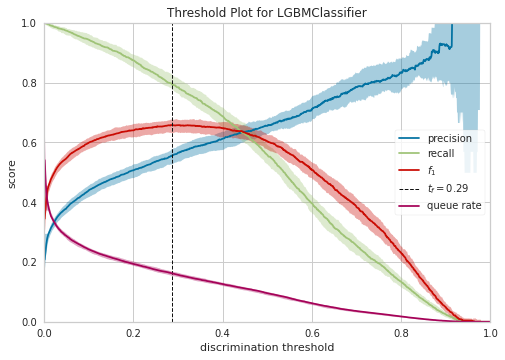

In [93]:
df = pd.read_csv('../input/bank-additional-full/bank-additional-full.csv', delimiter = ';')
df = df.drop_duplicates()
pipe = create_full_model(df,
                         models['LGBMClassifier'],
                         encoders['TargetEncoder'],
                         numTransformers['YeoJohnson'],
                         scalers['MinMaxScaler'],
                         )
clear_output()
dt_plot(df,pipe)

by default DiscriminantThreshold will try to find the optimal threshold based on f1 score. <br>
as we can see our f1 is at its best when the threshold equals to 0.29. 

### **GridSearchCV**

In [133]:
params = {
    'mod__boosting_type':['gbdt','dart','rf'],
    'mod__max_depth': [-1, 3, 5],
    'mod__n_estimators': [50, 100, 200, 500]
}

df = pd.read_csv('../input/bank-additional-full/bank-additional-full.csv', delimiter = ';')
df = df.drop_duplicates()

x = df[df.columns[:-1]]
y = df[df.columns[-1]]
y = [1 if i == 'yes' else 0 for i in y]

num_cols = x.dtypes[x.dtypes != object].index
obj_cols = x.dtypes[x.dtypes == object].index

ct = mct(
    (encoders['TargetEncoder'],obj_cols),
    (numTransformers['YeoJohnson'],num_cols),
    (scalers['MinMaxScaler'],num_cols),
    remainder = 'passthrough'
)

pipe = Pipeline(
    [
        ('ct',ct),
        ('mod',models['LGBMClassifier'])
    ]
)

clf = GridSearchCV(pipe, params,n_jobs = -1,scoring ='f1')

clf.fit(x,y)
clear_output()

In [159]:
bp = clf.best_params_
bp

{'mod__boosting_type': 'dart', 'mod__max_depth': -1, 'mod__n_estimators': 50}

In [144]:
params = {'boosting_type': bp[list(bp.keys())[0]], 'max_depth': bp[list(bp.keys())[1]], 'n_estimators': bp[list(bp.keys())[2]]}

df = pd.read_csv('../input/bank-additional-full/bank-additional-full.csv', delimiter = ';')
df = df.drop_duplicates()
pipe = create_full_model(df,
                         LGBMClassifier(random_state = 42,**params),
                         encoders['TargetEncoder'],
                         numTransformers['YeoJohnson'],
                         scalers['MinMaxScaler'],
                         .3
                         )

              precision    recall  f1-score   support

           0       0.97      0.92      0.94      7308
           1       0.54      0.78      0.64       928

    accuracy                           0.90      8236
   macro avg       0.76      0.85      0.79      8236
weighted avg       0.92      0.90      0.91      8236



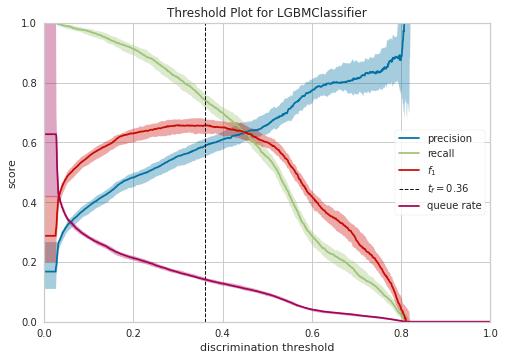

In [145]:
dt_plot(df,pipe)

In [146]:
params = {'boosting_type': bp[list(bp.keys())[0]], 'max_depth': bp[list(bp.keys())[1]], 'n_estimators': bp[list(bp.keys())[2]]}

df = pd.read_csv('../input/bank-additional-full/bank-additional-full.csv', delimiter = ';')
df = df.drop_duplicates()
pipe = create_full_model(df,
                         LGBMClassifier(random_state = 42,**params),
                         encoders['TargetEncoder'],
                         numTransformers['YeoJohnson'],
                         scalers['MinMaxScaler'],
                         .36
                         )

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      7308
           1       0.57      0.71      0.63       928

    accuracy                           0.91      8236
   macro avg       0.77      0.82      0.79      8236
weighted avg       0.92      0.91      0.91      8236



our model f1 score improved by 2% after all we've done. great! better than nothing

# Model Inference

### **we are going to take 1 sample from the original data frame at random and try to predict it using our new threshold to see whether our pipeline is working fine or not**

In [158]:
obs = df.sample(1, random_state = 456)
display(obs)
pred = pipe.predict_proba(obs)[0][1]
if pred >= .36:
    print('this person will subscribe')
else:
    print('this person won\'t subscribe')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
39664,40,admin.,single,basic.9y,no,yes,no,cellular,may,thu,...,1,3,3,success,-1.8,93.876,-40.0,0.683,5008.7,yes


this person will subscribe


***Judging from model report theres 57% chance that this person will actually subscribe. at at the and our model will be able to predict 71% from all future subscribers***